# Processing Simulation Data
This notebook is to be used as a local tool to process simulation data that is generated after running ```run_sim/sh``` in the repository. This allows all simulation information to be aggregated nicely and averaged. PANDAS is the primary tool for processing the data.

In [332]:
#imports
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib
import matplotlib.pyplot as plt
import math
from IPython.display import display
from matplotlib.colors import LogNorm
from matplotlib import cm
import os

%matplotlib inline

plt.rcParams['xtick.labelsize'] = 32
plt.rcParams['ytick.labelsize'] = 32
plt.rcParams['axes.labelsize'] = 40
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['figure.figsize'] = (17,10)
# print plt.rcParams.keys()

In [333]:
#get the data files
f_mean = []
f_mes = []
f_ei = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'metric' in name and 'mean' in root:
            f_mean.append(root + "/" + name)
        elif 'metric' in name and 'exp_improve' in root:
            f_ei.append(root + "/" + name)
        elif 'metric' in name and 'mes' in root:
            f_mes.append(root + "/" + name)

In [334]:
# variables for making dataframes
l = ['time', 'info_gain','aqu_fun', 'MSE', 'hotspot_error','max_loc_error', 'max_val_error', 
                    'simple_regret', 'sample_regret_loc', 'sample_regret_val', 'regret', 'info_regret',
                    'current_highest_obs', 'current_highest_obs_loc_x', 'current_highest_obs_loc_y',
                    'robot_loc_x', 'robot_loc_y', 'robot_loc_a', 'star_obs_0', 'star_obs_loc_x_0',
                    'star_obs_loc_y_0', 'star_obs_1', 'star_obs_loc_x_1', 'star_obs_loc_y_1']

In [335]:
#All UCB data
d = f_mean[0]
mean_data = pd.read_table(d, delimiter = " ", header=None)
mean_data = mean_data.T
mean_data.columns = l

for m in f_mean[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mean_data = mean_data.append(temp_data)

mean_data.head(5)
print len(mean_data)

6825


In [336]:
#All MES data
d = f_mes[0]
mes_data = pd.read_table(d, delimiter = " ", header=None)
mes_data = mes_data.T
mes_data.columns = l

for m in f_mes[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    mes_data = mes_data.append(temp_data)

mes_data.head(5)
print len(mes_data)

6825


In [337]:
#All EI data
d = f_ei[0]
ei_data = pd.read_table(d, delimiter = " ", header=None)
ei_data = ei_data.T
ei_data.columns = l

for m in f_ei[1:]:
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = l
    ei_data = ei_data.append(temp_data)

ei_data.head(5)
print len(ei_data)

6825


## Getting Averages at the End of Time
First, let's go ahead and get a snapshot of the last frame for all of these simulations

In [338]:
mean_end = mean_data[mean_data.time == 174]
mes_end = mes_data[mes_data.time == 174]
ei_end = ei_data[ei_data.time == 174]

for e in l:
    print '-------------'
    print str(e)
    print 'MEAN:    ' + str(mean_end[e].mean()) + ', ' + str(mean_end[e].std())
    print 'MES :    ' + str(mes_end[e].mean()) + ', '  + str(mes_end[e].std())
    print 'EI  :    ' + str(ei_end[e].mean()) + ', ' + str(ei_end[e].std())

-------------
time
MEAN:    174.0, 0.0
MES :    174.0, 0.0
EI  :    174.0, 0.0
-------------
info_gain
MEAN:    22984.9190394, 957.391056987
MES :    21715.460011, 1018.59939407
EI  :    17451.3942386, 2127.60604632
-------------
aqu_fun
MEAN:    346743.861616, 14563.7337376
MES :    466.314079084, 38.8376724499
EI  :    55328.1932, 11702.2826064
-------------
MSE
MEAN:    0.484441316856, 0.484213654732
MES :    0.720469896728, 0.43826454632
EI  :    6.5155755148, 6.22898938068
-------------
hotspot_error
MEAN:    0.680087176789, 0.677619321091
MES :    1.05416923363, 0.716340152794
EI  :    7.05495550043, 7.28696424086
-------------
max_loc_error
MEAN:    0.970467692376, 1.80216158363
MES :    0.857765551016, 1.69939559233
EI  :    0.692236299397, 1.48657349679
-------------
max_val_error
MEAN:    0.722681169769, 0.531140492887
MES :    0.718967205257, 0.520225611939
EI  :    0.704731390067, 0.544343058116
-------------
simple_regret
MEAN:    3.47068432934, 2.88499302107
MES :    1.14

## Looking at Samples
Now, we'll take a look at the relative distance from the best hotspot the samples across the trials were taken.

In [339]:
# get the robot log files
max_val = []
max_loc = []
path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'log' in name and 'mean' in root:
            temp = open(root+'/'+name, "r")
            for l in temp.readlines():
                if "max value" in l:
                    max_val.append(float(l.split(" ")[3]))
                    max_loc.append((float(l.split(" ")[6].split("[")[1]), float(l.split(" ")[7].split("]")[0])))

In [340]:
# get the robot samples list
mean_samples = []
mes_samples = []
ei_samples = []

path= '/home/vpreston/Documents/IPP/informative-path-planning/experiments'
for root, dirs, files in os.walk(path):
    for name in files:
        if 'robot_model' in name and 'mean' in root:
            mean_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'exp_improve' in root:
            ei_samples.append(root+"/"+name)
        elif 'robot_model' in name and 'mes' in root:
            mes_samples.append(root+"/"+name)

##### MEAN
mean_prop = []
d = mean_samples[0]
mean_sdata = pd.read_table(d, delimiter = " ", header=None)
mean_sdata = mean_sdata.T
mean_sdata.columns = ['x','y','a']
mean_sdata.loc[:, 'Distance'] = mean_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mean_prop.append(float(len(mean_sdata[mean_sdata.Distance < 1.5]))/len(mean_sdata))

for i,m in enumerate(mean_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mean_prop.append(float(len(temp_data[temp_data.Distance < 1.5]))/len(temp_data))
    mean_sdata = mean_sdata.append(temp_data)

##### MES
mes_prop = []
d = mes_samples[0]
mes_sdata = pd.read_table(d, delimiter = " ", header=None)
mes_sdata = mes_sdata.T
mes_sdata.columns = ['x','y','a']
mes_sdata.loc[:, 'Distance'] = mes_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
mes_prop.append(float(len(mes_sdata[mes_sdata.Distance < 1.5]))/len(mes_sdata))

for i,m in enumerate(mes_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    mes_prop.append(float(len(temp_data[temp_data.Distance < 1.5]))/len(temp_data))
    mes_sdata = mes_sdata.append(temp_data)

##### EI
ei_prop = []
d = ei_samples[0]
ei_sdata = pd.read_table(d, delimiter = " ", header=None)
ei_sdata = ei_sdata.T
ei_sdata.columns = ['x','y','a']
ei_sdata.loc[:, 'Distance'] = ei_sdata.apply(lambda x: np.sqrt((x['x']-max_loc[0][0])**2+(x['y']-max_loc[0][1])**2),axis=1)
ei_prop.append(float(len(ei_sdata[ei_sdata.Distance < 1.5]))/len(ei_sdata))

for i,m in enumerate(ei_samples[1:]):
    temp_data = pd.read_table(m, delimiter = " ", header=None)
    temp_data = temp_data.T
    temp_data.columns = ['x','y','a']
    temp_data.loc[:,'Distance'] = temp_data.apply(lambda x: np.sqrt((x['x']-max_loc[i+1][0])**2+(x['y']-max_loc[i+1][1])**2),axis=1)
    ei_prop.append(float(len(temp_data[temp_data.Distance < 1.5]))/len(temp_data))
    ei_sdata = ei_sdata.append(temp_data)

/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  
/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  


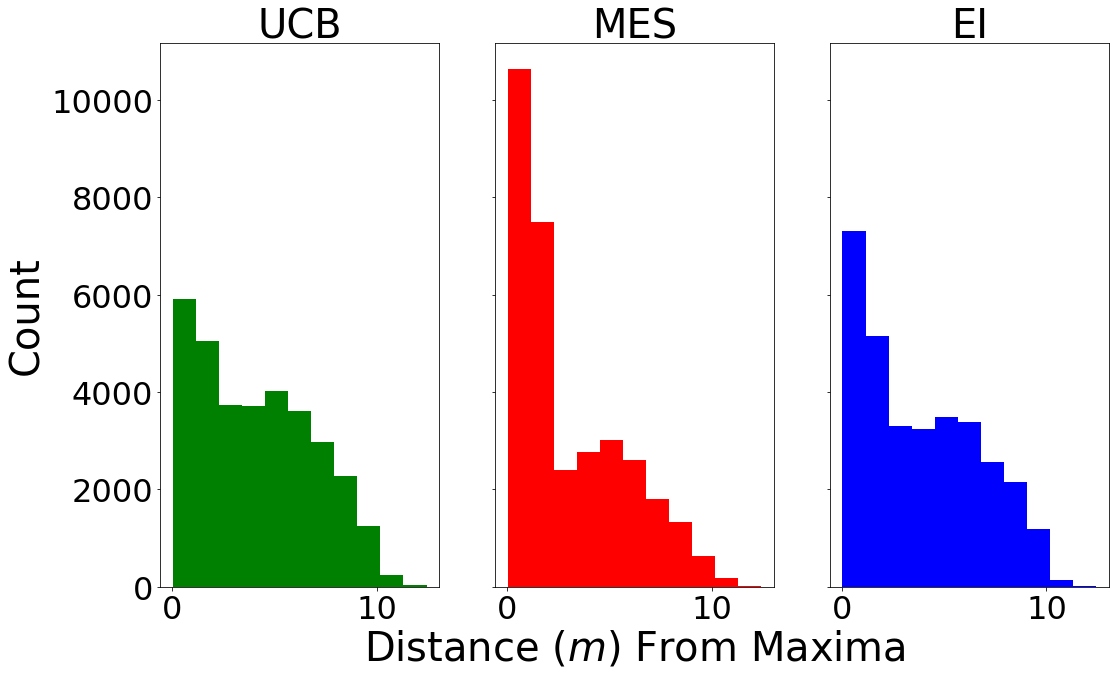

In [341]:
#make the aggregate histograms
fig, axes = plt.subplots(1, 3, sharey = True)

axes[0].hist(mean_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'g')
axes[0].set_title("UCB")
axes[1].hist(mes_sdata['Distance'].values, bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'r')
axes[1].set_title("MES")
axes[2].hist(ei_sdata['Distance'].values,bins = np.linspace(min(mean_sdata['Distance'].values), max(mean_sdata['Distance'].values), np.floor(max(mean_sdata['Distance'].values)-min(mean_sdata['Distance'].values))), color = 'b')
axes[2].set_title("EI")
axes[1].set_xlabel('Distance ($m$) From Maxima')
axes[0].set_ylabel('Count')
plt.savefig('agg_samples.png')
plt.show()

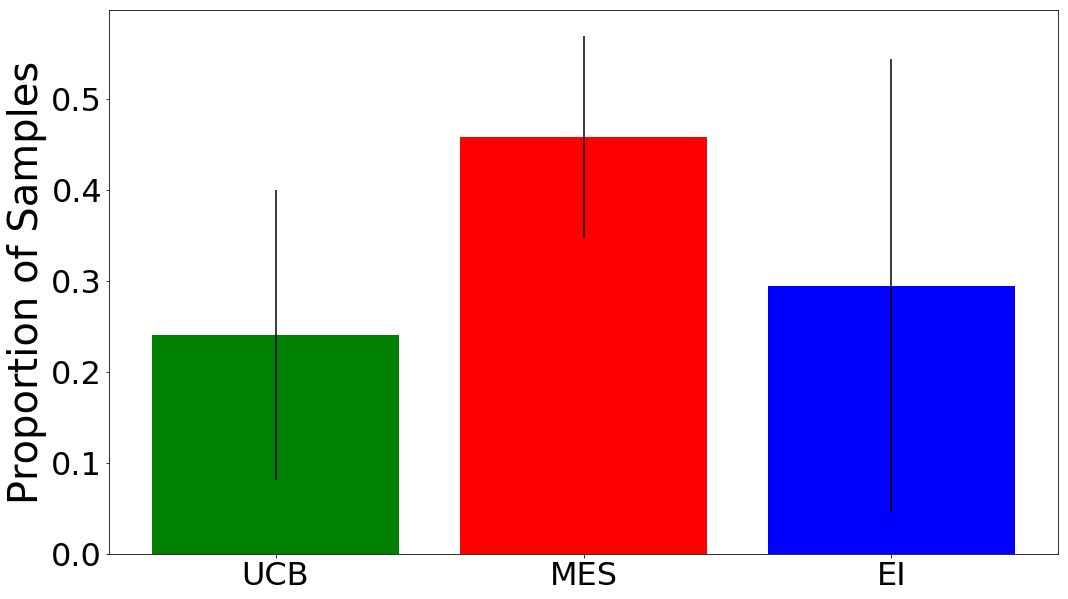

In [342]:
# make the proportional barcharts
plt.bar(np.arange(3), [sum(m)/len(m) for m in (mean_prop, mes_prop, ei_prop)], yerr=[np.std(m) for m in (mean_prop, mes_prop, ei_prop)], color=['g', 'r', 'b'])
plt.xticks(np.arange(3),['UCB', 'MES', 'EI'])
plt.ylabel('Proportion of Samples')
# plt.title('Average Proportion of Samples taken within 1.5m of the True Maxima')
plt.savefig('prop_samples')
plt.show()

## Getting Rates of Convergence
What about how things progress over time? Do things converge? When? Is it consistent? These sets of plots and figures attempt to address convergence; which hopefully lends itself to stopping criteria.

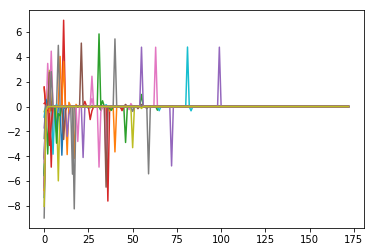

In [240]:
for i in range(19):
    slope = []
    for j in range(173):
        slope.append(mean_data[mean_data.time == j+1]['max_loc_error'].values[i]-mean_data[mean_data.time == j]['max_loc_error'].values[i])
    plt.plot(slope)
plt.show()

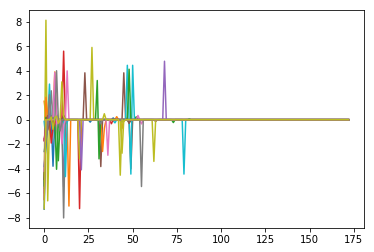

In [241]:
for i in range(19):
    slope = []
    for j in range(173):
        slope.append(mes_data[mes_data.time == j+1]['max_loc_error'].values[i]-mes_data[mes_data.time == j]['max_loc_error'].values[i])
    plt.plot(slope)
plt.show()

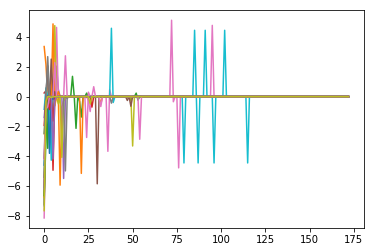

In [242]:
for i in range(19):
    slope = []
    for j in range(173):
        slope.append(ei_data[ei_data.time == j+1]['max_loc_error'].values[i]-ei_data[ei_data.time == j]['max_loc_error'].values[i])
    plt.plot(slope)
plt.show()

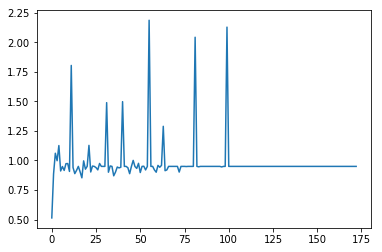

In [243]:
#based upon the definition of rate of convergence
a_mean = [0 for m in range(174)]
for i in range(19):
    slope = []
    for j in range(173):
        slope.append((mean_data[mean_data.time == j+1]['max_loc_error'].values[i]-0) / (mean_data[mean_data.time == j]['max_loc_error'].values[i]-0))
    a_mean = [m+n for m,n in zip(a_mean,slope)]
#     plt.plot(slope)

plt.plot([l/20 for l in a_mean])
plt.show()

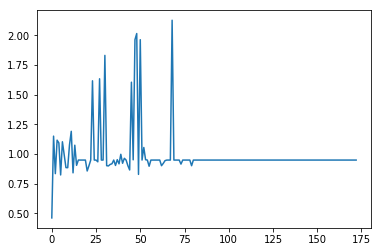

In [244]:
#based upon the definition of rate of convergence
a_mes = [0 for m in range(174)]
for i in range(19):
    slope = []
    for j in range(173):
        slope.append((mes_data[mes_data.time == j+1]['max_loc_error'].values[i]-0) / (mes_data[mes_data.time == j]['max_loc_error'].values[i]-0))
    a_mes = [m+n for m,n in zip(a_mes,slope)]
#     plt.plot(slope)

plt.plot([l/20 for l in a_mes])
plt.show()

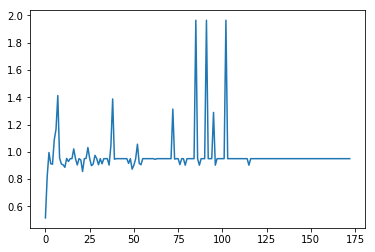

In [245]:
#based upon the definition of rate of convergence
a = [0 for m in range(174)]
for i in range(19):
    slope = []
    for j in range(173):
        slope.append((ei_data[ei_data.time == j+1]['max_loc_error'].values[i]-0) / (ei_data[ei_data.time == j]['max_loc_error'].values[i]-0))
    a = [m+n for m,n in zip(a,slope)]
#     plt.plot(slope)

plt.plot([l/20 for l in a])
plt.show()

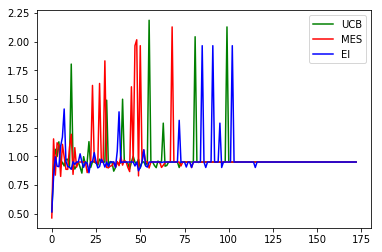

In [246]:
plt.plot([l/20 for l in a_mean], 'g', label='UCB')
plt.plot([l/20 for l in a_mes], 'r', label='MES')
plt.plot([l/20 for l in a], 'b', label='EI')
plt.legend()
plt.show()

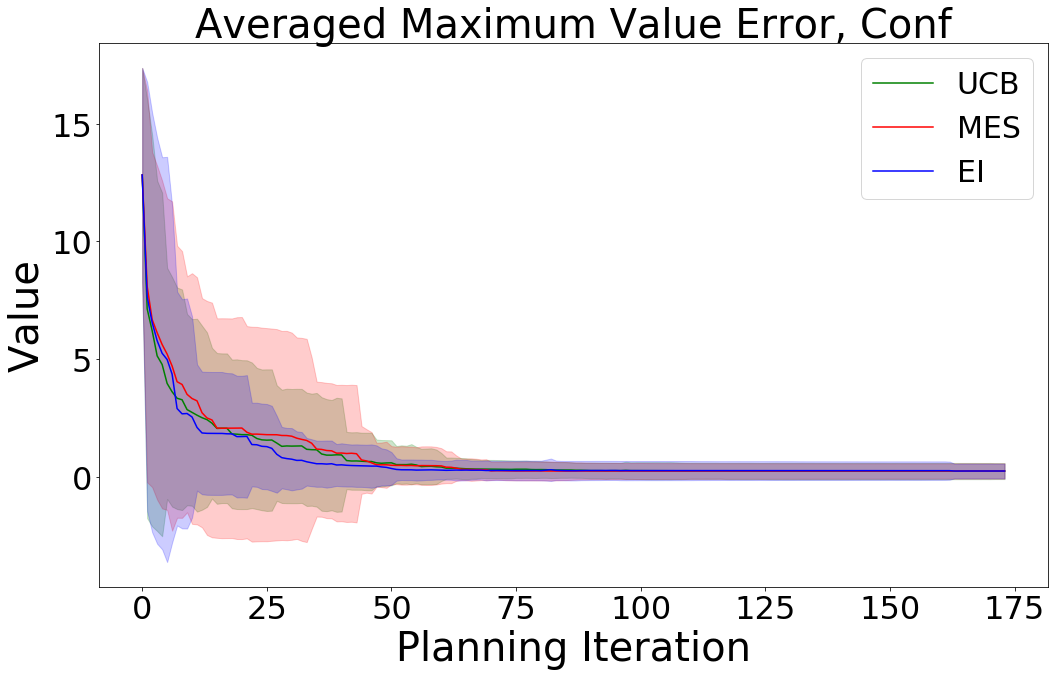

In [353]:
def make_plots(param,title,d=20, plot_confidence=False, save_fig=False, lab="Value"):
    #based upon the definition of rate of convergence
    ucb = [0 for m in range(174)]
    mes = [0 for m in range(174)]
    ei = [0 for m in range(174)]
    
    ucb_v = []
    mes_v = []
    ei_v = []
    
    for i in range(19):
        sm = []
        sme = []
        se = []
        for j in range(174):
            sm.append((mean_data[mean_data.time == j][param].values[i]))
            sme.append((mes_data[mes_data.time == j][param].values[i]))
            se.append((ei_data[ei_data.time == j][param].values[i]))
        ucb = [m+n for m,n in zip(ucb,sm)]
        mes = [m+n for m,n in zip(mes,sme)]
        ei = [m+n for m,n in zip(ei,se)]
        
        ucb_v.append(sm)
        mes_v.append(sme)
        ei_v.append(se)

        
    vucb = []
    vmes = []
    vei = []
    for i in range(174):
        t1 = []
        t2 = []
        t3 = []
        for m, n, o in zip(ucb_v, mes_v, ei_v):
            t1.append(m[i])
            t2.append(n[i])
            t3.append(o[i])
        vucb.append(np.std(t1))
        vmes.append(np.std(t2))
        vei.append(np.std(t3))
    
    plt.plot([l/d for l in ucb], 'g', label='UCB')
    plt.plot([l/d for l in mes], 'r', label='MES')
    plt.plot([l/d for l in ei], 'b', label='EI')
    
    if plot_confidence:
        x = [i for i in range(174)]
        y1 = [l/d + m for l,m in zip(ucb,vucb)]
        y2 = [l/d - m for l,m in zip(ucb,vucb)]

        y3 = [l/d + m for l,m in zip(mes,vmes)]
        y4 = [l/d - m for l,m in zip(mes,vmes)]

        y5 = [l/d + m for l,m in zip(ei,vei)]
        y6 = [l/d - m for l,m in zip(ei,vei)]

        plt.fill_between(x, y1, y2, color='g', alpha=0.2)
        plt.fill_between(x, y3, y4, color='r', alpha=0.2)
        plt.fill_between(x, y5, y6, color='b', alpha=0.2)
    
    plt.legend(fontsize=30)
    plt.xlabel("Planning Iteration")
    plt.ylabel(lab)
    
    if save_fig:
        plt.savefig(title)
    plt.title(title)
    plt.show()

make_plots('max_val_error', 'Averaged Maximum Value Error, Conf', 40, True, True)

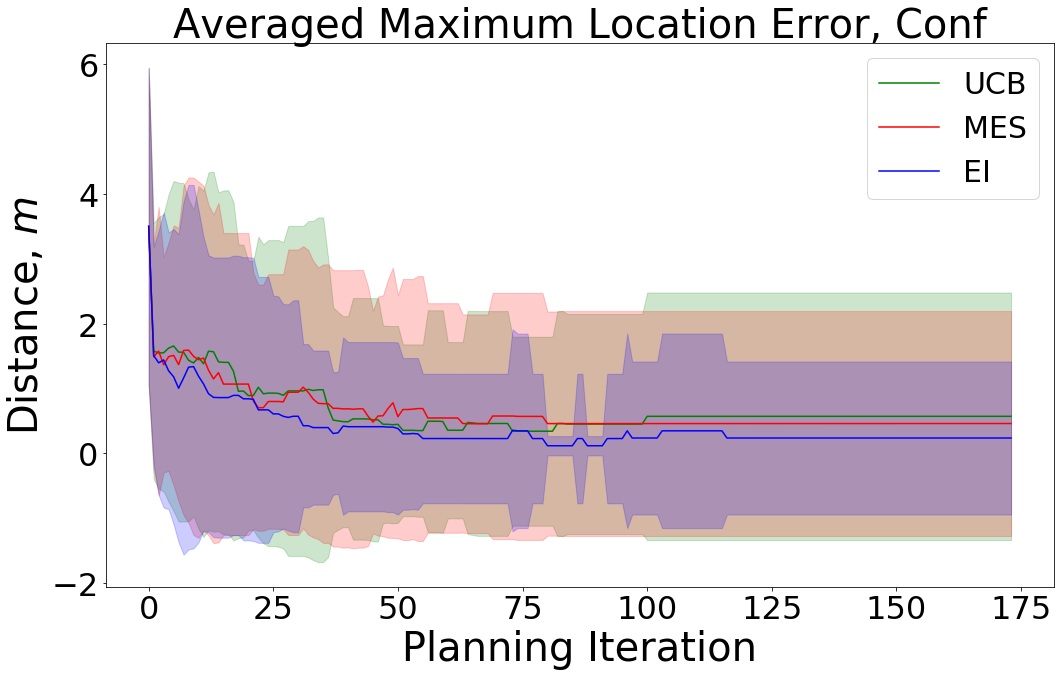

In [354]:
make_plots('max_loc_error', 'Averaged Maximum Location Error, Conf',40, True, True, "Distance, $m$")

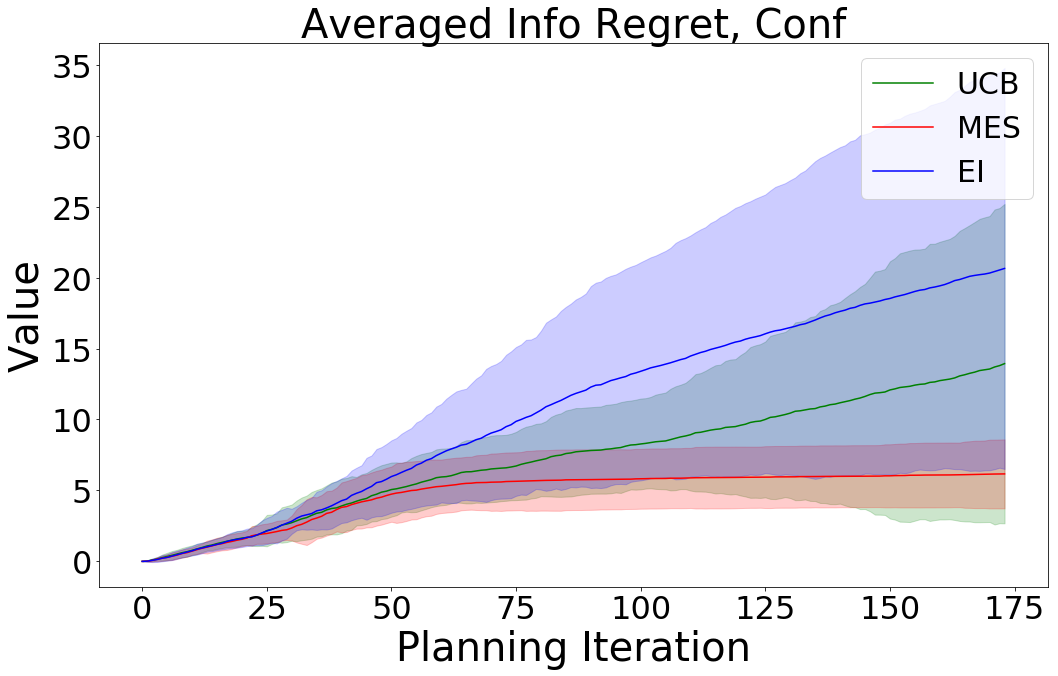

In [355]:
make_plots('info_regret', 'Averaged Info Regret, Conf', 40, True, True)

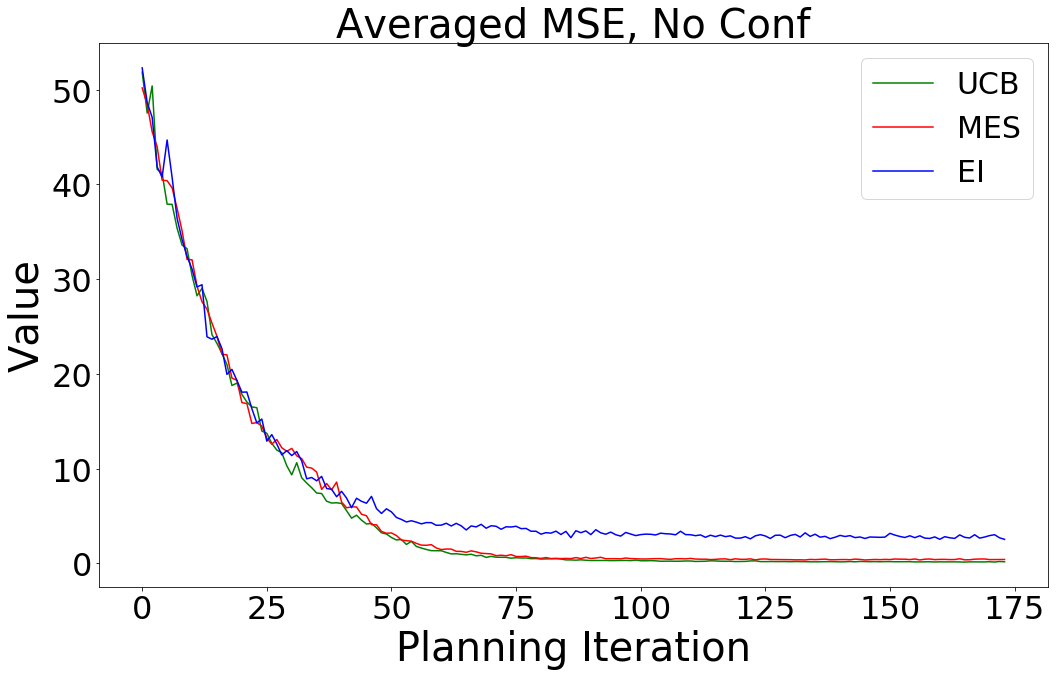

In [356]:
make_plots('MSE', 'Averaged MSE, No Conf', 40, False, True)

## Stopping Criteria
We have a hunch that the time to stop for MES is when the stars converge and the robot does along with it. Let's take a look at some of the simulations and see if this lines up with reality. We'll first do a close analysis of the first simulation; generate something generic, then iterate through all the simulations to see what's up!

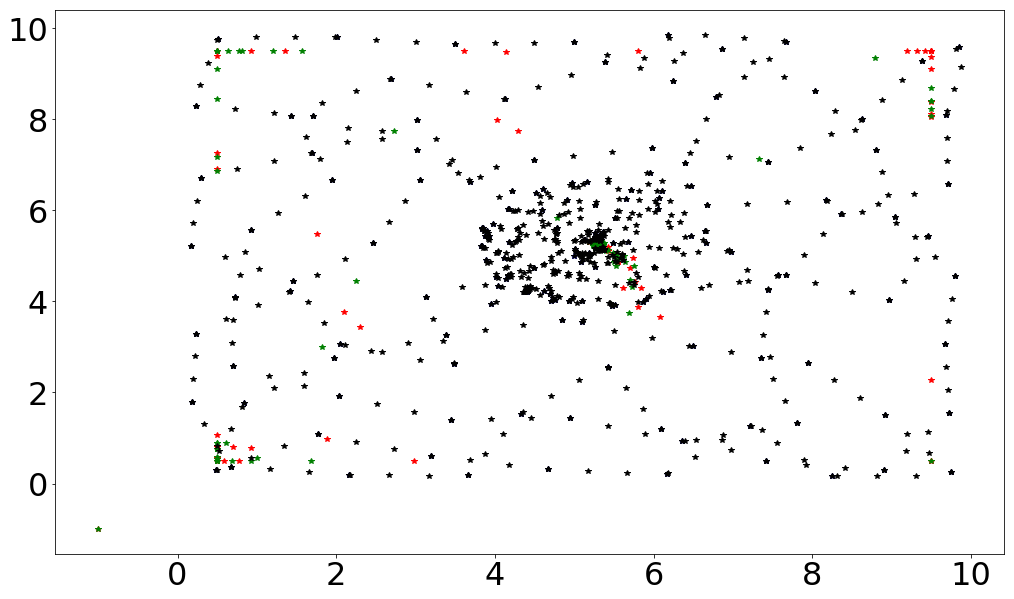

In [377]:
mes_data.head(2)
plt.plot(mes_data['robot_loc_x'].values[0:174], mes_data['robot_loc_y'].values[0:174], 'b*')
plt.plot(mes_data['star_obs_loc_x_0'].values[0:174], mes_data['star_obs_loc_y_0'].values[0:174], 'r*')
plt.plot(mes_data['star_obs_loc_x_1'].values[0:174], mes_data['star_obs_loc_y_1'].values[0:174], 'g*')

samp_vals_x = mes_sdata[(mes_sdata['x'] == mes_data['robot_loc_x'].values[174]) & (mes_sdata['y'] == mes_data['robot_loc_y'].values[174])]
idx = samp_vals_x.index[-1]

plt.plot(mes_sdata['x'].values[0:idx], mes_sdata['y'].values[0:idx], 'k*')

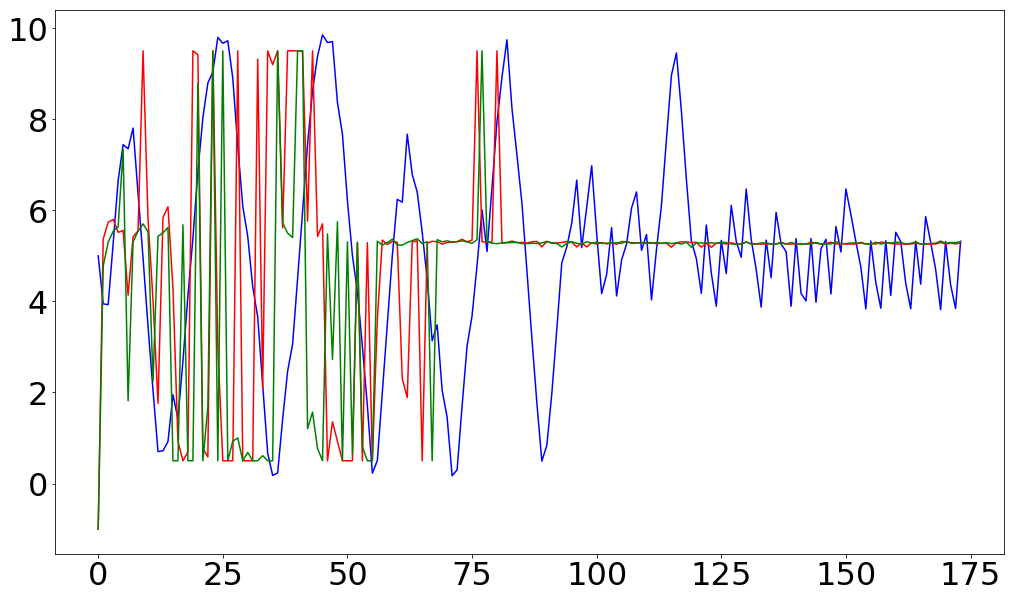

In [379]:
plt.plot(mes_data['robot_loc_x'].values[0:174], 'b')
plt.plot(mes_data['star_obs_loc_x_0'].values[0:174], 'r')
plt.plot(mes_data['star_obs_loc_x_1'].values[0:174], 'g')
plt.show()

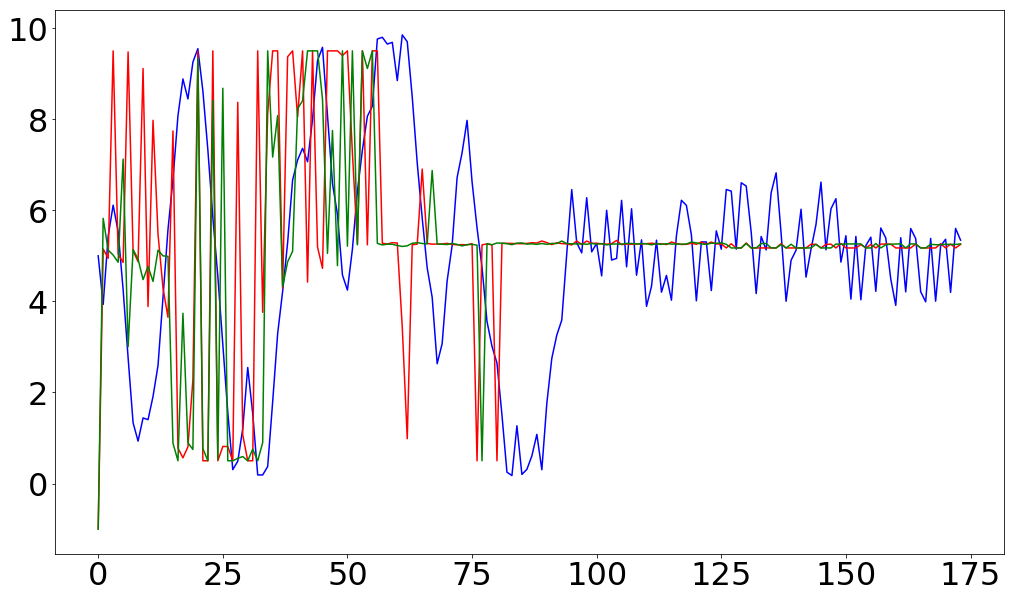

In [369]:
plt.plot(mes_data['robot_loc_y'].values[0:174], 'b')
plt.plot(mes_data['star_obs_loc_y_0'].values[0:174], 'r')
plt.plot(mes_data['star_obs_loc_y_1'].values[0:174], 'g')
plt.show()

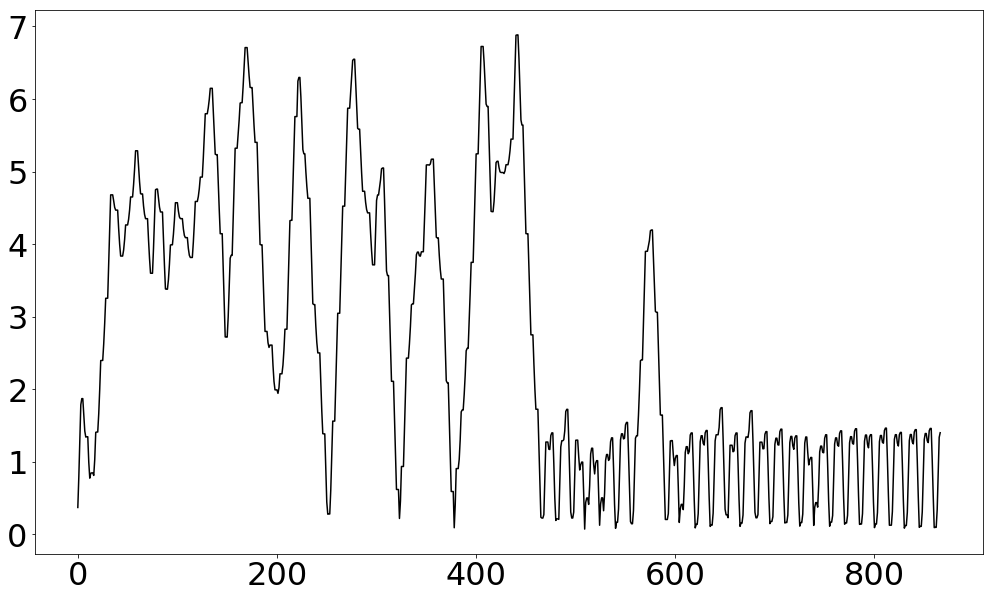

In [380]:
plt.plot(mes_sdata['Distance'].values[0:idx], 'k')

In [397]:
# Let's try to formulate the stopping criteria then

# Let's signal when the stars converge
def check_star_convergence(s0x, s0y, s1x, s1y, xlen, ylen):
    if np.fabs(s0x-s1x) < 0.01*xlen and s0x != -1:
        if np.fabs(s0y-s1y) < 0.01*ylen and s0y != -1:
            return True
    return False

# And when the vehicle has converged to that point
def check_vehicle_at_stars(rx, ry, s0x, s0y, s1x, s1y, trajlen):
    sx = (s0x+s1x)*0.5
    sy = (s0y+s1y)*0.5
    if np.fabs(sx-rx) < trajlen*0.5:
        if np.fabs(sy-ry) < trajlen*0.5:
            return True
    return False

# And we want to collect enough samples at the convergence area
def check_samples(num_samps, thresh):
    if num_samps >= thresh:
        return True
    return False
    

In [493]:
# Now, let's see!
def run_stopping_criteria(v, sampx, sampy):
    xlen = ylen = 10
    trajlen = 1.5
    time_to_stop = 174
    thresh = 100

    for i in range(174):
        num_samps = 0
        rx = mes_data['robot_loc_x'].values[i+175*v]
        ry = mes_data['robot_loc_y'].values[i+175*v]
        s0x = mes_data['star_obs_loc_x_0'].values[i+175*v]
        s1x = mes_data['star_obs_loc_x_1'].values[i+175*v]
        s0y = mes_data['star_obs_loc_y_0'].values[i+175*v]
        s1y = mes_data['star_obs_loc_y_1'].values[i+175*v]

        if check_star_convergence(s0x, s0y, s1x, s1y, xlen, ylen):
            if check_vehicle_at_stars(rx, ry, s0x, s0y, s1x, s1y, trajlen):
                samp_id = sampsx.index(rx)
                dist = [np.sqrt((x-rx)**2 + (y-ry)**2) for x,y in zip(sampx[0:samp_id], sampy[0:samp_id])]
                for d in dist:
                    if d < 1.5*0.5:
                        num_samps += 1
                if check_samples(num_samps, thresh):
                    time_to_stop = i
                    break

#     plt.plot(mes_data['robot_loc_x'].values[0+175*v:174+175*v], 'b')
#     plt.plot(mes_data['star_obs_loc_x_0'].values[0+175*v:174+175*v], 'r')
#     plt.plot(mes_data['star_obs_loc_x_1'].values[0+175*v:174+175*v], 'g')
#     plt.axvline(time_to_stop, color='r')
#     plt.show()
    
    if time_to_stop == 174:
        plt.plot(mes_data['robot_loc_x'].values[0+175*v:174+175*v], 'b')
        plt.plot(mes_data['star_obs_loc_x_0'].values[0+175*v:174+175*v], 'r')
        plt.plot(mes_data['star_obs_loc_x_1'].values[0+175*v:174+175*v], 'g')
        plt.axvline(time_to_stop, color='r')
        plt.title("Stopping Fails")
        plt.show()
    
    actual_final = [mes_data['info_regret'].values[174+175*v],
                    mes_data['MSE'].values[174+175*v],
                    mes_data['max_loc_error'].values[174+175*v],
                    mes_data['max_val_error'].values[174+175*v]]
    
    stopped_final = [mes_data['info_regret'].values[time_to_stop+175*v],
                     mes_data['MSE'].values[time_to_stop+175*v],
                     mes_data['max_loc_error'].values[time_to_stop+175*v],
                     mes_data['max_val_error'].values[time_to_stop+175*v]
                    ]
    
    return actual_final, stopped_final

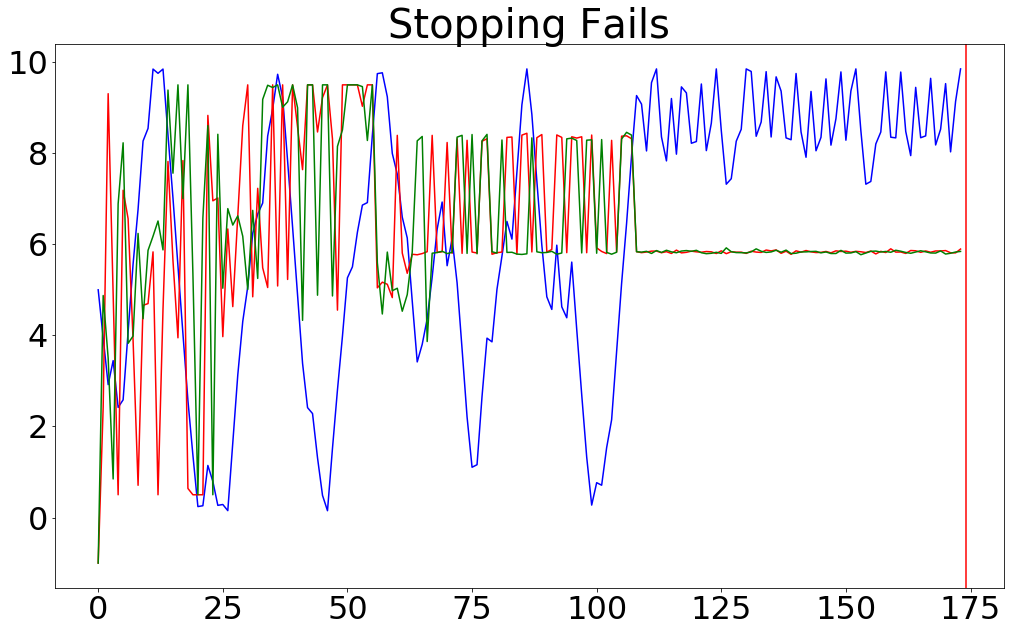

In [494]:
# automating
# plt.plot(mes_sdata['x'])
# print mes_data[mes_data['robot_loc_x']==5.0].index
# print mes_data['robot_loc_x'].values[175]
idx = 0
true = []
stop = []
for i in range(39):
    sampsx = mes_sdata['x'].values.tolist()
    ids = [m for m in range(len(sampsx)) if sampsx[m] == 5.0]
    try:
        nextidx = ids[i+1]
    except:
        nextidx = -1
    sampsx = mes_sdata['x'].values[idx:nextidx].tolist()
    sampsy = mes_sdata['y'].values[idx:nextidx].tolist()
    actual, stopped = run_stopping_criteria(i,sampsx, sampsy)
    idx = nextidx
    true.append(actual)
    stop.append(stopped)

In [489]:
print 'Param: Budget, Stopped'
for t,s in zip(true,stop):
    print '------'
    print 'Info Regret: ' + str(t[0]) + ', ' + str(s[0])
    print 'MSE:         ' + str(t[1]) + ', ' + str(s[1])
    print 'Loc Error    ' + str(t[2]) + ', ' + str(s[2])
    print 'Val Error    ' + str(t[3]) + ', ' + str(s[3])
        

Param: Budget, Stopped
------
Info Regret: 12.786325840131717, 12.78070656448765
MSE:         0.11096017645357731, 0.2758008168088309
Loc Error    0.12833153923530718, 0.12833153923530718
Val Error    1.1942030774489396, 1.1969259392216995
------
Info Regret: 14.860274255988063, 13.797832893643822
MSE:         0.39798914385193845, 0.3394687124227399
Loc Error    0.3490995292499337, 0.3490995292499337
Val Error    0.3245487551944634, 0.33484708752244785
------
Info Regret: 10.486353960702125, 10.090023778728291
MSE:         0.7877759483307238, 1.0852952593210279
Loc Error    0.11039496425223656, 0.11039496425223656
Val Error    1.0133474004013792, 1.0187855730595032
------
Info Regret: 11.525157377896303, 11.343008582068068
MSE:         0.825918718105002, 1.070736557272884
Loc Error    0.31224411132641033, 0.31224411132641033
Val Error    0.500913726479844, 0.4899428281182309
------
Info Regret: 14.393547126184234, 13.369491820281718
MSE:         0.398016811642102, 0.5349382432611647
Lo

In [490]:
# Let's see the averages?
info_reg_true = [m[0] for m in true]
info_reg_stop = [m[0] for m in stop]

mse_true = [m[1] for m in true]
mse_stop = [m[1] for m in stop]

loc_true = [m[2] for m in true]
loc_stop = [m[2] for m in stop]

val_true = [m[3] for m in true]
val_stop = [m[3] for m in stop]

print 'Info Regret, Mean and STD'
print 'True: ', np.mean(info_reg_true), np.std(info_reg_true)
print 'Stop: ', np.mean(info_reg_stop), np.std(info_reg_stop)
print 'MSE, Mean and STD'
print 'True: ', np.mean(mse_true), np.std(mse_true)
print 'Stop: ', np.mean(mse_stop), np.std(mse_stop)
print 'Loc Error, Mean and STD'
print 'True: ', np.mean(loc_true), np.std(loc_true)
print 'Stop: ', np.mean(loc_stop), np.std(loc_stop)
print 'Val Error, Mean and STD'
print 'True: ', np.mean(val_true), np.std(val_true)
print 'Stop: ', np.mean(val_stop), np.std(val_stop)

Info Regret, Mean and STD
True:  13.829282022852807 3.566056244447351
Stop:  13.245890840798547 3.2124974897389085
MSE, Mean and STD
True:  0.7204698967280837 0.43260928298691687
Stop:  0.7859994647831853 0.7073464118700626
Loc Error, Mean and STD
True:  0.8577655510161117 1.6774669885591198
Stop:  0.8577655510161117 1.6774669885591198
Val Error, Mean and STD
True:  0.7189672052572216 0.5135127421599655
Stop:  0.7200838720659547 0.5179383479271009
